In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [02:05<00:00, 21.6MB/s]
100% 2.29G/2.29G [02:05<00:00, 19.6MB/s]


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2

import os
import matplotlib.image as mpimg

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import keras

train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256))

test_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256))

validation_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/val',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [6]:
import keras
from keras import layers

# Create the CNN model
model = keras.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from convolutional layers
model.add(layers.Flatten())

# Add dense layers for classification
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
history = model.fit(train_dataset,
          epochs=2,
          validation_data=validation_dataset)

Epoch 1/2
163/163 [==============================] - 47s 197ms/step - loss: 22.5338 - accuracy: 0.8583 - val_loss: 0.3351 - val_accuracy: 0.8125
Epoch 2/2
163/163 [==============================] - 32s 190ms/step - loss: 1.1675 - accuracy: 0.9225 - val_loss: 0.6235 - val_accuracy: 0.8750


1/1 [==============================] - 0s 18ms/step
Normal


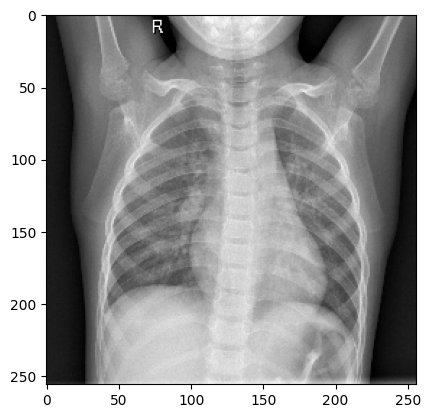

In [14]:
# Load the image from the directory "/content/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg" with the target size of (256, 256)
test_image = tf.keras.utils.load_img ("/content/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg" , target_size = (256,256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array and expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities<0.5:
    print("Normal")
else:
    print("Pneumonia")
